**PRIVILEDGE** **MUROMBEKA** **R207113W** **HDSC**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
movies = pd.read_csv('/content/drive/My Drive/Exam Datasets/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
ratings = pd.read_csv('/content/drive/My Drive/Exam Datasets/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
movies = movies.drop_duplicates()
ratings = ratings.drop_duplicates()

In [27]:
movies = movies.dropna()
ratings = ratings.dropna()

# **(a)**

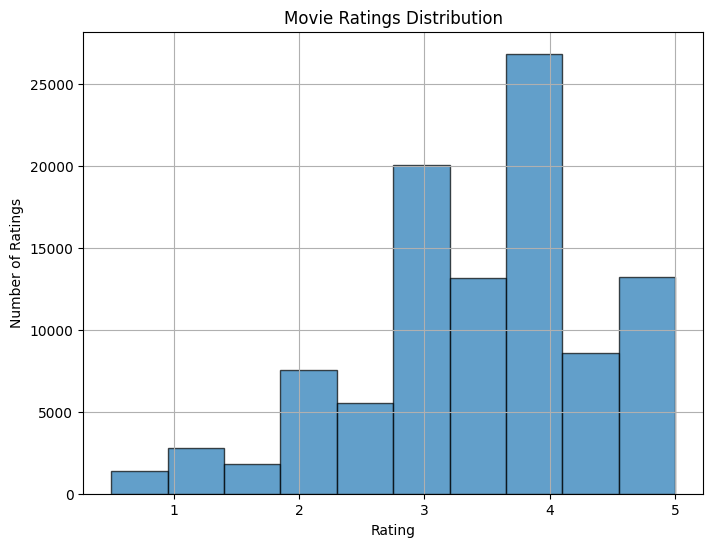

In [29]:
# Plotting the histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()


# **(b)**

In [30]:
# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='movieId')

# Group by movieId and title, and calculate mean rating and count of ratings
top_rated = movie_ratings.groupby(['movieId', 'title']).agg({'rating': ['mean', 'count']}).reset_index()
top_rated.columns = ['movieId', 'title', 'mean_rating', 'count_ratings']

# Filter movies rated by at least a threshold number of users
threshold = 50
filtered_movies = top_rated[top_rated['count_ratings'] >= threshold]

# Sort the movies by mean rating and rating count in descending order
top_5_best_rated = filtered_movies.sort_values(by=['mean_rating', 'count_ratings'], ascending=[False, False]).head(5)

print(top_5_best_rated[['title', 'mean_rating', 'count_ratings']])


                                                  title  mean_rating  \
277                    Shawshank Redemption, The (1994)     4.429022   
659                               Godfather, The (1972)     4.289062   
2224                                  Fight Club (1999)     4.272936   
974                               Cool Hand Luke (1967)     4.271930   
602   Dr. Strangelove or: How I Learned to Stop Worr...     4.268041   

      count_ratings  
277             317  
659             192  
2224            218  
974              57  
602              97  


# **(c)**

In [31]:
# Group by userId and count the number of ratings
top_users = ratings.groupby('userId').size().reset_index(name='count_ratings').sort_values(by='count_ratings', ascending=False).head(5)

print(top_users)

     userId  count_ratings
413     414           2698
598     599           2478
473     474           2108
447     448           1864
273     274           1346


# **(d)**

In [32]:
# Creating the user-movie matrix
user_movie_matrix = pd.pivot_table(movie_ratings, index='userId', columns='title', values='rating')

print(user_movie_matrix.head())


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             Na

# **(e)**

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))

# Convert to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

def recommend_movies(user_id, movie_title):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:6]  # top 5 similar users
    similar_users_ratings = user_movie_matrix.loc[similar_users]
    recommended_movies = similar_users_ratings.mean().sort_values(ascending=False)
    return recommended_movies[recommended_movies.index != movie_title].head()

# Example: Recommend movies to user-3 based on "To Die For"
print(recommend_movies(3, 'To Die For'))


title
Beauty and the Beast (1991)            5.0
There's Something About Mary (1998)    5.0
Batman (1989)                          5.0
Battleship Potemkin (1925)             5.0
Titanic (1997)                         5.0
dtype: float64


# **(f)**

In [ ]:
# Calculate cosine similarity between movies
item_similarity = cosine_similarity(user_movie_matrix.fillna(0).T)

def recommend_similar_movies(movie_title):
    if movie_title in item_similarity_df.columns:
        similar_movies = item_similarity_df[movie_title].sort_values(ascending=False).index[1:6]  # top 5 similar movies
        return similar_movies
    else:
        return "Movie title not found in the data."

# Example: Let's find a valid movie title using a movieId
movie_id = 1  # This is an example movieId
movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]

# Now, recommend similar movies based on this title
print(recommend_similar_movies(movie_title))